# linear regression in high dimensions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
airline_data = pd.read_csv('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/data/airline_costs.txt',delim_whitespace=True, index_col=False, header=None)

airline_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [6]:
airline_data.shape

(31, 12)

In [7]:
import urllib.request  #this package is useful for accessing text files over internet 
drug_vs_mathscore_data_description_file = urllib.request.urlopen('http://users.stat.ufl.edu/~winner/data/airline_costs.txt')


for line in drug_vs_mathscore_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

Dataset:  airline_costs.dat



Source: J.W. Proctor and J.S. Duncan (1954). "A Regression Analysis

of Airline Costs," Journal of Air Law and Commerce, Vol.21, #3, pp.282-292.



Description: Regression relating Operating Costs per revenue ton-mile

to 7 factors: length of flight, speed of plane, daily flight time per aircraft,

population served, ton-mile load factor, available tons per aircraft mile,

and firms net assets. Regression based on natural logarithms of all

factors, except load factor. Load factor and available tons (capacity)

for Northeast Airlines was imputed from summary calculations.



Variables/columns

Airline   1-20

Length of flight (miles)  22-28

Speed of Plane (miles per hour)  30-36

Daily Flight Time per plane (hours)  38-44

Population served (1000s)   46-52

Total Operating Cost (cents per revenue ton-mile)  54-60

Revenue Tons per Aircraft mile   62-68

Ton-Mile load factor (proportion)  70-76

Available Capacity (Tons per mile)  78-84

Total Assets  ($1

In [9]:
airline_data.columns = ['Airline', 'Flight Length', 'Plane Speed','Daily flight time per plane', 'Population Served','TOC','Revenue','Load Factor','Capacity','Total Assets','Funds','Adjusted Assets']


#check by printing the data again
airline_data.head()

,Airline,Flight Length,Plane Speed,Daily flight time per plane,Population Served,TOC,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [10]:
# shifting the toc to second position

toc_col = airline_data.pop('TOC')

airline_data.insert(1,'TOC',toc_col)

airline_data.head()

,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,21.13,3.21,17.92
1,American,43.0,270,216,6.93,56928,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,141.5,100,140,4.45,183,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,195.02,6.06,188.96


Also note that Adjusted Assets column is sufficient for our analysis, since it is obtained as difference of Total Assets and Funds. So we shall remove Total Assets and Funds columns

In [11]:
total_assets = airline_data.pop('Total Assets')
funds = airline_data.pop('Funds')

airline_data.head()

,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,17.92
1,American,43.0,270,216,6.93,56928,3.98,0.689,5.776,1271.31
2,Bonanza,141.5,100,140,4.45,183,0.79,0.358,2.207,6.64
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,154.49
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,188.96


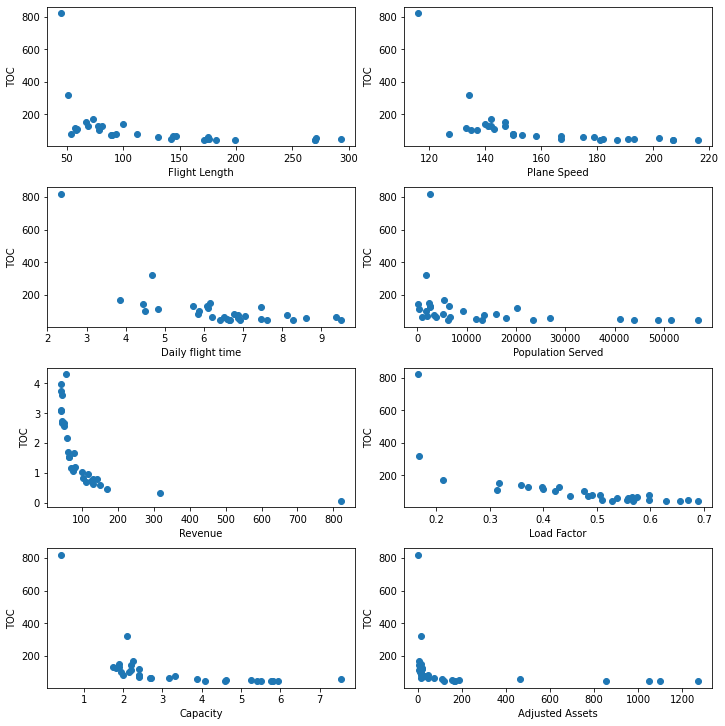

In [15]:
fig = plt.figure(figsize=(10,10))
fig.constrained_layout=True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

ax11.scatter(airline_data['Flight Length'],airline_data['TOC'])
#ax11.set_title('TOC vs Flight Length')
ax11.set_xlabel('Flight Length')
ax11.set_ylabel('TOC')


ax12.scatter(airline_data['Plane Speed'],airline_data['TOC'])
#ax12.set_title('TOC vs Plane Speed')
ax12.set_xlabel('Plane Speed')
ax12.set_ylabel('TOC')

ax21.scatter(airline_data['Daily flight time per plane'],airline_data['TOC'])
#ax13.set_title('TOC vs Daily flight time')
ax21.set_xlabel('Daily flight time')
ax21.set_ylabel('TOC')

ax22.scatter(airline_data['Population Served'],airline_data['TOC'])
#ax14.set_title('TOC vs Population Served')
ax22.set_xlabel('Population Served')
ax22.set_ylabel('TOC')

ax31.scatter(airline_data['TOC'],airline_data['Revenue'])
#ax21.set_title('TOC vs Revenue')
ax31.set_xlabel('Revenue')
ax31.set_ylabel('TOC')

ax32.scatter(airline_data['Load Factor'],airline_data['TOC'])
#ax22.set_title('TOC vs Load Factor')
ax32.set_xlabel('Load Factor')
ax32.set_ylabel('TOC')

ax41.scatter(airline_data['Capacity'],airline_data['TOC'])
#ax23.set_title('TOC vs Capacity')
ax41.set_xlabel('Capacity')
ax41.set_ylabel('TOC')

ax42.scatter(airline_data['Adjusted Assets'],airline_data['TOC'])
#ax24.set_title('TOC vs Adjusted Assets')
ax42.set_xlabel('Adjusted Assets')
ax42.set_ylabel('TOC')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

$\large{\text{How to estimate the parameters } \beta_j, j=0,1,\ldots,d?}$ 

One way to estimate the values of $\beta_j, j=0,1,\ldots,d$ is by minimizing the sum of squared errors given by: 
$
\begin{align}
\min \sum_{i=1}^{n} (e^i)^2 
\end{align}
$
which can be equivalently written as the following optimization problem:
$
\begin{align}
\min_{\beta_0,\beta_1,\ldots,\beta_d} \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$

$\textbf{Note}$ that in the high dimensional case as well, the optimization problem is called the ordinary least squares (OLS) problem, and the term $\sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2$ is called the OLS objective function and we will denote the OLS objective by:

$
\begin{align}
L(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

In [19]:
n = len(airline_data.index)
print(n)

31


In [20]:
col = [2,3,4,5,6,7,8,9]
x_data = airline_data[airline_data.columns[col]]

x_data

,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
0,57,133,6.10,20200,0.96,0.400,2.400,17.92
1,270,216,6.93,56928,3.98,0.689,5.776,1271.31
2,100,140,4.45,183,0.79,0.358,2.207,6.64
3,176,182,6.60,11869,2.57,0.557,4.614,154.49
4,142,167,7.47,41097,2.68,0.510,5.255,188.96
5,51,134,4.67,1757,0.35,0.167,2.096,14.01
6,175,175,8.60,18000,2.17,0.558,3.889,111.05
7,112,150,6.87,13500,1.68,0.505,3.327,34.55
8,131,179,6.50,3831,1.70,0.537,3.166,46.25
9,174,191,7.60,13119,2.74,0.598,4.582,170.45


In [22]:
x_arr = x_data.to_numpy()
x_arr

array([[5.70000e+01, 1.33000e+02, 6.10000e+00, 2.02000e+04, 9.60000e-01,
        4.00000e-01, 2.40000e+00, 1.79200e+01],
       [2.70000e+02, 2.16000e+02, 6.93000e+00, 5.69280e+04, 3.98000e+00,
        6.89000e-01, 5.77600e+00, 1.27131e+03],
       [1.00000e+02, 1.40000e+02, 4.45000e+00, 1.83000e+02, 7.90000e-01,
        3.58000e-01, 2.20700e+00, 6.64000e+00],
       [1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.54490e+02],
       [1.42000e+02, 1.67000e+02, 7.47000e+00, 4.10970e+04, 2.68000e+00,
        5.10000e-01, 5.25500e+00, 1.88960e+02],
       [5.10000e+01, 1.34000e+02, 4.67000e+00, 1.75700e+03, 3.50000e-01,
        1.67000e-01, 2.09600e+00, 1.40100e+01],
       [1.75000e+02, 1.75000e+02, 8.60000e+00, 1.80000e+04, 2.17000e+00,
        5.58000e-01, 3.88900e+00, 1.11050e+02],
       [1.12000e+02, 1.50000e+02, 6.87000e+00, 1.35000e+04, 1.68000e+00,
        5.05000e-01, 3.32700e+00, 3.45500e+01],
       [1.31000e+02, 1.79000e+02

In [24]:
# adding 1 to last at x_arr

x_final = np.hstack((x_arr,np.ones((x_arr.shape[0],1))))
x_final

array([[5.70000e+01, 1.33000e+02, 6.10000e+00, 2.02000e+04, 9.60000e-01,
        4.00000e-01, 2.40000e+00, 1.79200e+01, 1.00000e+00],
       [2.70000e+02, 2.16000e+02, 6.93000e+00, 5.69280e+04, 3.98000e+00,
        6.89000e-01, 5.77600e+00, 1.27131e+03, 1.00000e+00],
       [1.00000e+02, 1.40000e+02, 4.45000e+00, 1.83000e+02, 7.90000e-01,
        3.58000e-01, 2.20700e+00, 6.64000e+00, 1.00000e+00],
       [1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.54490e+02, 1.00000e+00],
       [1.42000e+02, 1.67000e+02, 7.47000e+00, 4.10970e+04, 2.68000e+00,
        5.10000e-01, 5.25500e+00, 1.88960e+02, 1.00000e+00],
       [5.10000e+01, 1.34000e+02, 4.67000e+00, 1.75700e+03, 3.50000e-01,
        1.67000e-01, 2.09600e+00, 1.40100e+01, 1.00000e+00],
       [1.75000e+02, 1.75000e+02, 8.60000e+00, 1.80000e+04, 2.17000e+00,
        5.58000e-01, 3.88900e+00, 1.11050e+02, 1.00000e+00],
       [1.12000e+02, 1.50000e+02, 6.87000e+00, 1.35000e+04, 1.

In [31]:
y = airline_data[airline_data.columns[1]].to_numpy()

y_final = y.reshape(31,1)
y_final

array([[116.3],
       [ 43. ],
       [141.5],
       [ 50.6],
       [ 51. ],
       [318.5],
       [ 59.2],
       [ 77. ],
       [ 62.3],
       [ 45.3],
       [ 42.6],
       [112.4],
       [125.2],
       [169.3],
       [ 64.8],
       [100.5],
       [ 42.9],
       [ 81.1],
       [ 56.7],
       [ 75.4],
       [ 71.3],
       [150.1],
       [ 78.9],
       [130.3],
       [ 46.2],
       [ 42.3],
       [103.3],
       [ 44.2],
       [ 64.7],
       [820.9],
       [130.9]])

In [35]:
XTX = np.matmul(np.transpose(x_final),x_final)
print(x_final.shape)
print(XTX.shape)

(31, 9)
(9, 9)


In [36]:
XTY = np.matmul(np.transpose(x_final),y_final)
print(XTY.shape)

(9, 1)


In [37]:
beta = np.matmul(np.linalg.inv(XTX),XTY)
print(beta.shape)
print('beta',beta)

(9, 1)
beta [[ 6.64923065e-02]
 [-1.81342350e+00]
 [ 1.35069567e+01]
 [ 2.50178284e-03]
 [ 7.22550880e+02]
 [-2.19188200e+03]
 [-3.79344260e+02]
 [-2.44534555e-01]
 [ 1.36822689e+03]]


## residual plot


In [38]:
e_i_residuals = []

for i in range(n):
    x_i = x_final[i,:]
    y_i = y_final[i]

    y_pred_i = np.dot(x_i,beta)
    e_i = y_i - y_pred_i

    e_i_residuals.append(e_i)


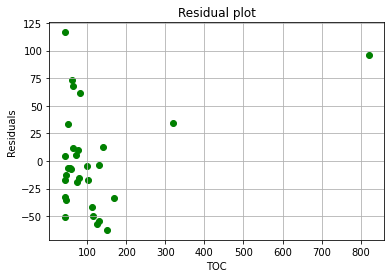

In [41]:
plt.scatter(airline_data['TOC'], e_i_residuals,color='g')
plt.title("Residual plot")
plt.xlabel("TOC")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note that the residual plot helps to check the variance in the errors 
. From the residual plot, we observe an outlier in terms of actual TOC value, since the TOC seems to be very high for that particular airline. There is another airline which has a slightly larger TOC value when compared to the other airlines. However it is unclear if that can be considered as an outlier.

## calculating the score

In [42]:
y_bar = 0

for i in range(n):
    y_bar += float(airline_data.iat[i,1])
y_bar /= n
print('y_bar',y_bar)

y_bar 113.50645161290323


In [43]:
sigma_yy = 0

for i in range(n):
    sigma_yy += (float(airline_data.iat[i,1]) - y_bar)**2

print('sigma_yy',sigma_yy)

sigma_yy 610938.3987096774


In [44]:
l = 0

for i in range(n):
    x_i = x_final[i,:]
    y_i = y_final[i]

    y_pred_i = np.dot(x_i , beta)
    e_i = y_i - y_pred_i

    l += (e_i)**2

print('l',l)

l [61207.50152302]


In [45]:
# score

score = 1-(l/sigma_yy)
print(score)

[0.89981396]



Though score value on its own indicates a reasonable fit, taken together with the residual plot, it indicates that the linear regression model being fit for the data might be affected by the outlier and care shoud be taken when trying to interpret the model.